In [1]:
import numpy as np
import scipy

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
    
from datetime import datetime
import time

In [16]:
class OrthogonalCollocations:
    
    def __init__(self, V_0, R, M):
        self.V_0 = V_0
        self.R = R
        self.M = M
        
        # grid points
        self.x = np.linspace(-R, R, M+1)
        self.delta = self.x[1] - self.x[0]
        
        # collocation points
        self.x_c = np.zeros(2*self.M)
        self.x_c[::2] = self.x[:-1] + self.delta/2 * (1 - 1/np.sqrt(3))
        self.x_c[1::2] = self.x[:-1] + self.delta/2 * (1 + 1/np.sqrt(3))
        
    
    def V(self, x):
        return self.V_0 * np.exp(-x**2)
    
    
    # functions in S_{3,2}
    def phi(self, k, x_):
        if x_ > self.x[k] - self.delta and x_ <= self.x[k]:
            return -2/self.delta**3 * (x_-self.x[k])**3 - 3/self.delta**2 * (x_-self.x[k])**2 + 1
        elif x_ > self.x[k] and x_ <= self.x[k] + self.delta:
            return 2/self.delta**3 * (x_-self.x[k])**3 - 3/self.delta**2 * (x_-self.x[k])**2 + 1
        else:
            return 0.0
        
    def psi(self, k, x_):
        if x_ > self.x[k] - self.delta and x_ <= self.x[k]:
            return 1/self.delta**2 * (x_-self.x[k])**3 + 2/self.delta * (x_-self.x[k])**2 + (x_-self.x[k])
        elif x_ > self.x[k] and x_ <= self.x[k] + self.delta:
            return 1/self.delta**2 * (x_-self.x[k])**3 - 2/self.delta * (x_-self.x[k])**2 + (x_-self.x[k])
        else:
            return 0.0
    
    
    # second derivatives of these functions
    def phi_xx(self, k, x_):
        if x_ > self.x[k] - self.delta and x_ <= self.x[k]:
            return -12/self.delta**3 * (x_-self.x[k]) - 6/self.delta**2
        elif x_ > self.x[k] and x_ <= self.x[k] + self.delta:
            return 12/self.delta**3 * (x_-self.x[k]) - 6/self.delta**2
        else:
            return 0.0

        
    def psi_xx(self, k, x_):
        if x_ > self.x[k] - self.delta and x_ <= self.x[k]:
            return 6/self.delta**2 * (x_-self.x[k]) + 4/self.delta
        elif x_ > self.x[k] and x_ <= self.x[k] + self.delta:
            return 6/self.delta**2 * (x_-self.x[k]) - 4/self.delta
        else:
            return 0.0


    # functions that form something like basis in S_{3,2}
    def S(self, l, x_):
        if l == 0 or l == 2*self.M:
            return self.psi(l//2, x_)
        elif l % 2 == 1:
            return self.psi((l+1)//2, x_)
        else:
            return self.phi(l//2, x_)

        
    # and their second derivatives
    def S_xx(self, l, x_):
        if l == 0 or l == 2*self.M:
            return self.psi_xx(l//2, x_)
        elif l % 2 == 1:
            return self.psi_xx((l+1)//2, x_)
        else:
            return self.phi_xx(l//2, x_)
    
    def sqrt_eigvals(self):
        A = np.zeros((2*self.M, 2*self.M))
        B = np.zeros((2*self.M, 2*self.M))

        for l in range(2*self.M):
            for t in range(2*self.M):
                A[l,t] = -self.S_xx(l, self.x_c[t]) + self.V(self.x_c[t]) * self.S(l, self.x_c[t])
                B[l,t] = self.S(l, self.x_c[t])
        
        sqrt_B_inv = scipy.linalg.inv(scipy.linalg.sqrtm(B))
        Mat = sqrt_B_inv @ A @ sqrt_B_inv
        w = np.sort(scipy.linalg.eigvals(Mat))
        return w[(w>self.V_0)*(w<0.0)]
    
    def eigvals(self):
        A = np.zeros((2*self.M, 2*self.M))
        B = np.zeros((2*self.M, 2*self.M))

        for l in range(2*self.M):
            for t in range(2*self.M):
                A[l,t] = -self.S_xx(l, self.x_c[t]) + self.V(self.x_c[t]) * self.S(l, self.x_c[t])
                B[l,t] = self.S(l, self.x_c[t]) 
                
        w = np.sort(scipy.linalg.eigvals(a=A, b=B))
        print(w)
        return w[(w>self.V_0)*(w<0.0)]
    
#     def eigvals(self):
#         A = np.zeros((2*self.M, 2*self.M))
#         B = np.zeros((2*self.M, 2*self.M))

#         for l in range(2*self.M):
#             for t in range(2*self.M):
#                 A[l,t] = -self.S_xx(l, self.x_c[t]) + self.V(self.x_c[t]) * self.S(l, self.x_c[t])
#                 B[l,t] = self.S(l, self.x_c[t]) 

#         Mat = scipy.linalg.inv(B) @ A
        
#         eigvals = np.sort(scipy.linalg.eigvals(Mat))
        
#         return eigvals[(eigvals<0.0)*(eigvals>self.V_0)]

In [17]:
n = np.zeros(10)
v0 = np.linspace(-20.0+1e-2, -1e-2, len(n))

for i in range(len(n)):
    oc = OrthogonalCollocations(-5, 15, 300)
    n[i] = len(oc.eigvals())
    print("Num of points = {}".format(n[i]))
#     n[i] = len(oc.eigvals())
    if i % 5 == 0: print(i)

[-3.14033349e+00+0.j -4.06119890e-01+0.j  4.53513596e-02+0.j
  6.00098611e-02+0.j  1.81533183e-01+0.j  2.33839621e-01+0.j
  4.08939437e-01+0.j  5.11555937e-01+0.j  7.28167882e-01+0.j
  8.86694893e-01+0.j  1.13979023e+00+0.j  1.35551415e+00+0.j
  1.64406962e+00+0.j  1.91566335e+00+0.j  2.24081752e+00+0.j
  2.56564615e+00+0.j  2.92944948e+00+0.j  3.30460050e+00+0.j
  3.70916206e+00+0.j  4.13212087e+00+0.j  4.57912341e+00+0.j
  5.04807017e+00+0.j  5.53860943e+00+0.j  6.05241889e+00+0.j
  6.58706554e+00+0.j  7.14514656e+00+0.j  7.72410731e+00+0.j
  8.32620557e+00+0.j  8.94948686e+00+0.j  9.59552344e+00+0.j
  1.02630502e+01+0.j  1.09530181e+01+0.j  1.16647007e+01+0.j
  1.23986119e+01+0.j  1.31543745e+01+0.j  1.39322383e+01+0.j
  1.47320258e+01+0.j  1.55538446e+01+0.j  1.63976196e+01+0.j
  1.72633900e+01+0.j  1.81511282e+01+0.j  1.90608441e+01+0.j
  1.99925296e+01+0.j  2.09461841e+01+0.j  2.19218064e+01+0.j
  2.29193935e+01+0.j  2.39389457e+01+0.j  2.49804602e+01+0.j
  2.60439378e+01+0.j  2.

KeyboardInterrupt: 

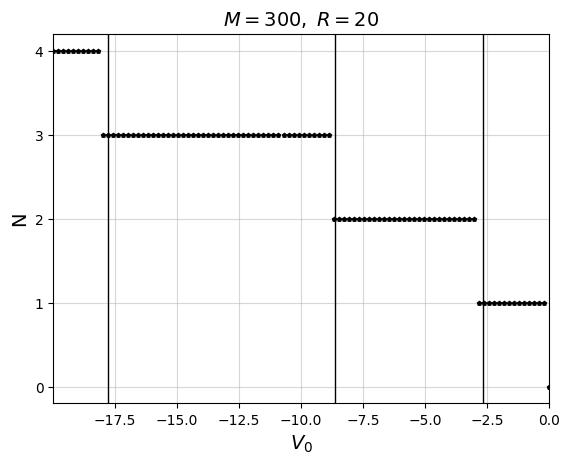

In [5]:
plt.plot(v0, n, linestyle='', marker='p', color='black', ms=3)
plt.axvline(x=-2.684, color='black', linestyle='-', linewidth=1)
plt.axvline(x=-8.650, color='black', linestyle='-', linewidth=1)
plt.axvline(x=-17.796, color='black', linestyle='-', linewidth=1)

plt.xlabel(r'$V_0$', fontsize=14)
plt.ylabel('N', fontsize=14)

plt.title(r'$M=300,\; R=20$', fontsize=14)

plt.yticks([0,1,2,3,4])
plt.xlim(v0[0], 0)

plt.grid(alpha=0.5)

# plt.savefig('figures/num_eigen_vs_v0.pdf')